In [ ]:
!pip install kaggle


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle kernels output rakibhossainsajib/crop-recommendation-using-machine-learning -p /path/to/dest


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
!kaggle kernels output rakibhossainsajib/crop-recommendation-using-machine-learning -p ./crop_recommendation


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
!pip install transformers huggingface_hub


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("climatebert/distilroberta-base-climate-detector")
model = AutoModelForSequenceClassification.from_pretrained("climatebert/distilroberta-base-climate-detector")

# Function to classify text
def classify_climate_text(text):
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

    # Get model predictions
    with torch.no_grad():
        outputs = model(**inputs)

    # Get prediction probabilities
    probs = torch.nn.functional.softmax(outputs.logits, dim=-1)

    # Get predicted class
    predicted_class = torch.argmax(probs, dim=1).item()

    # Print the probabilities for each class
    print("Class probabilities:", probs)

    # Return the predicted class
    return predicted_class

# Example usage:
if __name__ == "__main__":
    text = "Climate change is causing more frequent extreme weather events."
    result = classify_climate_text(text)
    print(f"Predicted class: {result}")


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Class probabilities: tensor([[0.0036, 0.9964]])
Predicted class: 1


In [ ]:
pip install datasets


In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
from transformers.pipelines.pt_utils import KeyDataset
import datasets
from tqdm.auto import tqdm

dataset_name = "climatebert/climate_detection"
model_name = "climatebert/distilroberta-base-climate-detector"

# If you want to use your own data, simply load them as 🤗 Datasets dataset, see https://huggingface.co/docs/datasets/loading
dataset = datasets.load_dataset(dataset_name, split="test")

model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name, max_len=512)

pipe = pipeline("text-classification", model=model, tokenizer=tokenizer, device=0)

# See https://huggingface.co/docs/transformers/main_classes/pipelines#transformers.pipeline
for out in tqdm(pipe(KeyDataset(dataset, "text"), padding=True, truncation=True)):
   print(out)

README.md:   0%|          | 0.00/4.35k [00:00<?, ?B/s]

(…)-00000-of-00001-4b831beb8839bf3e.parquet:   0%|          | 0.00/360k [00:00<?, ?B/s]

(…)-00000-of-00001-87f8706e009e9b75.parquet:   0%|          | 0.00/132k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1300 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/400 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


  0%|          | 0/400 [00:00<?, ?it/s]

{'label': 'yes', 'score': 0.9976720213890076}
{'label': 'yes', 'score': 0.996562659740448}
{'label': 'yes', 'score': 0.9969623684883118}
{'label': 'yes', 'score': 0.8857951164245605}
{'label': 'yes', 'score': 0.9982670545578003}
{'label': 'yes', 'score': 0.9979409575462341}
{'label': 'yes', 'score': 0.9983693957328796}
{'label': 'no', 'score': 0.9725663065910339}
{'label': 'yes', 'score': 0.9983727931976318}
{'label': 'yes', 'score': 0.9977611303329468}
{'label': 'no', 'score': 0.9972770810127258}
{'label': 'yes', 'score': 0.9983199238777161}
{'label': 'yes', 'score': 0.9981712102890015}
{'label': 'no', 'score': 0.9938029050827026}
{'label': 'yes', 'score': 0.9977520108222961}
{'label': 'no', 'score': 0.989312469959259}
{'label': 'yes', 'score': 0.9971289038658142}
{'label': 'yes', 'score': 0.9984995126724243}
{'label': 'yes', 'score': 0.9980247020721436}
{'label': 'yes', 'score': 0.9982415437698364}
{'label': 'yes', 'score': 0.9973576664924622}
{'label': 'yes', 'score': 0.982855319976

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
from transformers.pipelines.pt_utils import KeyDataset
import datasets
from tqdm.auto import tqdm

# Dataset and model names
dataset_name = "climatebert/climate_detection"
model_name = "climatebert/distilroberta-base-climate-detector"

# Load the dataset
dataset = datasets.load_dataset(dataset_name, split="test")

# Load the model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name, max_len=512)

# Create a text classification pipeline
pipe = pipeline("text-classification", model=model, tokenizer=tokenizer, device=0)

# Iterate over the dataset and classify the text
for out in tqdm(pipe(KeyDataset(dataset, "text"), padding=True, truncation=True)):
    print(out)


  0%|          | 0/400 [00:00<?, ?it/s]

{'label': 'yes', 'score': 0.9976720213890076}
{'label': 'yes', 'score': 0.996562659740448}
{'label': 'yes', 'score': 0.9969623684883118}
{'label': 'yes', 'score': 0.8857951164245605}
{'label': 'yes', 'score': 0.9982670545578003}
{'label': 'yes', 'score': 0.9979409575462341}
{'label': 'yes', 'score': 0.9983693957328796}
{'label': 'no', 'score': 0.9725663065910339}
{'label': 'yes', 'score': 0.9983727931976318}
{'label': 'yes', 'score': 0.9977611303329468}
{'label': 'no', 'score': 0.9972770810127258}
{'label': 'yes', 'score': 0.9983199238777161}
{'label': 'yes', 'score': 0.9981712102890015}
{'label': 'no', 'score': 0.9938029050827026}
{'label': 'yes', 'score': 0.9977520108222961}
{'label': 'no', 'score': 0.989312469959259}
{'label': 'yes', 'score': 0.9971289038658142}
{'label': 'yes', 'score': 0.9984995126724243}
{'label': 'yes', 'score': 0.9980247020721436}
{'label': 'yes', 'score': 0.9982415437698364}
{'label': 'yes', 'score': 0.9973576664924622}
{'label': 'yes', 'score': 0.982855319976

In [ ]:
from transformers import AutoFeatureExtractor, AutoModelForImageClassification, pipeline
from PIL import Image
import requests
from io import BytesIO

# Load pre-trained model and feature extractor
model_name = "google/vit-base-patch16-224"
feature_extractor = AutoFeatureExtractor.from_pretrained(model_name)
model = AutoModelForImageClassification.from_pretrained(model_name)

# Create an image classification pipeline
pipe = pipeline("image-classification", model=model, feature_extractor=feature_extractor)

# Load an image from URL or local file
def load_image(image_path):
    if image_path.startswith('http'):
        response = requests.get(image_path)
        img = Image.open(BytesIO(response.content))
    else:
        img = Image.open(image_path)
    return img

# Example usage
image_path = "/content/cloud_image.jpg"  # Replace with your image path or URL
image = load_image(image_path)

# Predict
results = pipe(image)

# Print results
for result in results:
    print(f"Label: {result['label']}, Score: {result['score']}")


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Label: jellyfish, Score: 0.33680233359336853
Label: volcano, Score: 0.2799164354801178
Label: bubble, Score: 0.023029502481222153
Label: geyser, Score: 0.022596845403313637
Label: wing, Score: 0.013566263020038605


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


The Weather is likely to rain


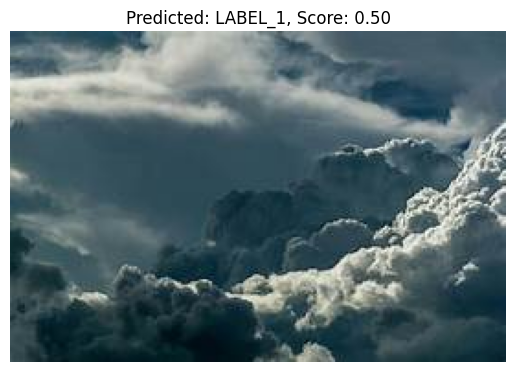

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
from transformers import AutoFeatureExtractor, AutoModelForImageClassification, pipeline

# Load your model and tokenizer
model_name = "google/vit-base-patch16-224-in21k"  # Replace with your model
feature_extractor = AutoFeatureExtractor.from_pretrained(model_name)
model = AutoModelForImageClassification.from_pretrained(model_name)
pipe = pipeline("image-classification", model=model, feature_extractor=feature_extractor)

# Load the image
image_path = "/content/cloud_image_2.jpg"  # Replace with your image path
image = Image.open(image_path)

# Predict
results = pipe(image)
print("The Weather is likely to rain")

# Show the image
plt.imshow(image)
plt.axis('off')  # Hide axis
plt.title(f"Predicted: {results[0]['label']}, Score: {results[0]['score']:.2f}")
plt.show()
